In [2]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [86]:
n=int(5e6)
t=np.linspace(-10,10,n)

#parameters
a = 3.25; b=-6.5
x=polyval([3.25,-6.5],t)

#add some noise
xn=x+3*randn(n)

C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\44879507.py:6: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  x=polyval([3.25,-6.5],t)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\44879507.py:9: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  xn=x+3*randn(n)


C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\559528374.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\559528374.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  yvar=polyval([a,b],xvar)+3*randn(20)


[-1.17456623 -3.74707075  6.09653122 -2.13149843  9.17829584  8.82911177
  3.57571472  3.11685862  5.55411911 -7.46711549 -5.4858431  -4.4944589
  1.04059021 -3.31966666 -1.73172235 -4.29549886 -5.9912432  -6.84678337
 -2.5202905   3.29053866] [ -9.35904634 -14.64262646  12.3277953  -12.53385007  25.9024958
  18.23746241  11.44711605   6.04679904   8.72003734 -33.23291967
 -23.0865007  -18.62595501  -4.71913509 -13.40713878  -9.93658522
 -19.40581574 -22.59673293 -27.31826565 -12.95849322   3.59648794]


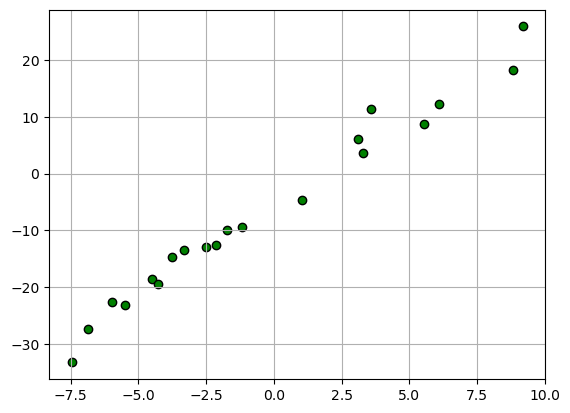

In [94]:
xvar=np.random.choice(t, size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
print(xvar, yvar)
plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.show()

In [88]:
t1=time.time()
(ar, br)=polyfit(t,xn,1)
print(ar,br)
## xr 은 회귀식 위에 y값 찍은거
xr=polyval([ar,br],t)

# xr-xn 은 회귀식 위에 y값 xr, 원자료 y값 이므로 잔차
err = sqrt(sum((xr-xn)**2)/n)

t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters : a=%.2f b=%.2f, mse=%.3f' % (ar,br,err))

C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\3748505715.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  (ar, br)=polyfit(t,xn,1)


3.250154981472676 -6.502136407520643


C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\3748505715.py:5: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  xr=polyval([ar,br],t)


Linear regression using polyfit
parameters : a=3.25 b=-6.50, mse=3.000


C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\3748505715.py:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  err = sqrt(sum((xr-xn)**2)/n)


C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\680828245.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\680828245.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\680828245.py:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit_line = polyfit(xvar, yvar, 1)


[-8.44463169  9.4945599 ]


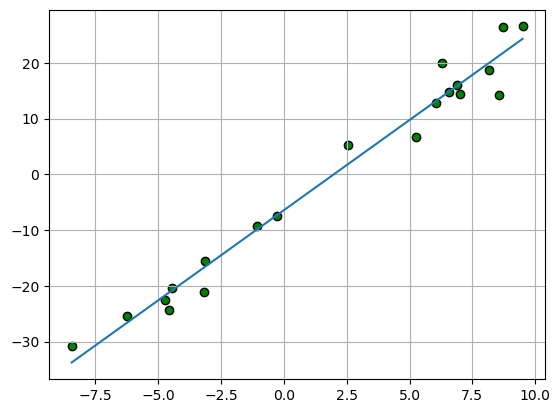

In [96]:
xvar=np.random.choice(t, size=20)
yvar=polyval([a,b],xvar)+3*randn(20)

fit_line = polyfit(xvar, yvar, 1)

x_minmax = np.array([min(xvar), max(xvar)])
fit_y = x_minmax * fit_line[0] + fit_line[1]
print(x_minmax)

plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.plot(x_minmax, fit_y)
plt.show()

C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\2579205225.py:2: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\2579205225.py:2: DeprecationWarning: scipy.randn is deprecated and will be removed in SciPy 2.0.0, use numpy.random.randn instead
  yvar=polyval([a,b],xvar)+3*randn(20)
C:\Users\hmins\AppData\Local\Temp\ipykernel_12704\2579205225.py:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit_line = polyfit(xvar, yvar, 1)


 
3.392 x - 6.669


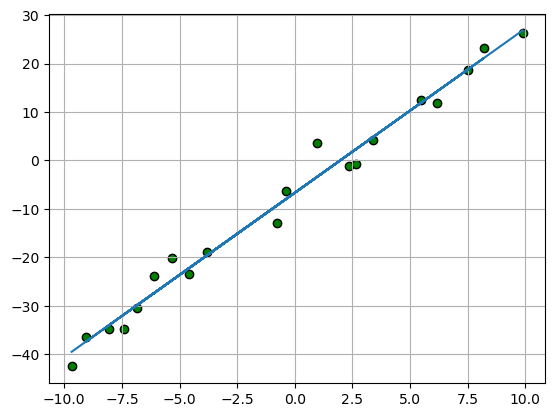

In [98]:
xvar=np.random.choice(t, size=20)
yvar=polyval([a,b],xvar)+3*randn(20)

fit_line = polyfit(xvar, yvar, 1)

p = np.poly1d(fit_line)
print(p)


plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.plot(xvar, p(xvar))
plt.show()

* int(5e6) = 5 * 10^6 = 500000
* int(1e3) = 1 * 10^3 = 1000
---------------
* np.linspace(start, stop, num) : start부터 stop까지 num개 1차원 배열 생성
---------------
* p = [p2, p1, p0]
* polyval(p, 2) : p2 * x^2 + p1 * x^1 + p0  - x=2일때 다항식 표현
> - ex) p = [3, -2, 5, 0, 1], x = np.linspace(-10,10,2)
> - x = array([-10, 10])
> - polyval(p,x)
$$3X^4 - 2X^3 + 5X^2 + 1$$ X 값 -10, 10 대입
> - array([32501, 28501])
---------------
* randn(n) : 정규분포된 난수로 구성된 n x n 행렬
---------------
* np.random.choice(t, size=20) : t 안에 20개 랜덤추출
---------------
* python 컬러 : c ( Cyan ), k ( Black ), y ( Yellow )
---------------
* plt.grid(True) : 격자 그림 O
---------------
* polyfit(a,b,1) : 회귀식 b0, b1 값 나옴
* output - (3.5, -15) : 회귀식 $$3.5 x - 15$$
---------------
* 산점도 위에 추세선 그리기 1번
> - xvar : x값 500000개 중에 20개 랜덤추출
> - yvar : y값 a~b 범위 안에 다항식 y값 20개 랜덤추출
> - fit_line(추세선) : x값의 최대 최소 구해서 array형식으로 변환
> - fit_y = x_minmax * fit_line[0] + fit_line[1]
> - fit_line[0] : b1, fit_line[1] : b0
> - fit_ y는 [(x의 최솟값 * b1 + b0 , x의 최댓값 * b1 + b0)]
* 산점도 위에 추세선 그리기 2번
> - fit_line = polyfit(xvar, yvar, 1)
> - b1, b0 구하기
> - p = np.poly1d(fit_line) : 추세선 1차원 캡슐화 (output = 3.269 x - 6.334)
> - plt.plot(xvar, p(xvar))